In [7]:
import json
from json.decoder import JSONDecodeError

In [11]:
%ls

data/                     overview.md               src/
model_notes.md            readme.md                 tim_fraud_notebook.ipynb


In [13]:
with open('data/data.json', 'r') as handle:
    data = json.load(handle)

In [22]:
# print(json.dumps(VARIABLE, sort_keys=True, indent=4))
print(json.dumps(data[26], sort_keys=True, indent=4))

{
    "acct_type": "fraudster",
    "approx_payout_date": 1299607200,
    "body_length": 870,
    "channels": 11,
    "country": "US",
    "currency": "USD",
    "delivery_method": 0.0,
    "description": "<h1 class=\"post\">Welcome</h1>\r\n<p>\u00a0</p>\r\n<div class=\"entry\">\r\n<div class=\"article\">\r\n<h1 style=\"text-align: center;\"><span style=\"color: #800000;\"><strong>5th Annual Earth Transformation Conference: </strong></span></h1>\r\n<h1 style=\"text-align: center;\"><span style=\"color: #800000;\"><strong>Igniting the Inner Spark </strong></span></h1>\r\n<h1 style=\"text-align: center;\"><span style=\"color: #800000;\">Additional seminars before and after</span></h1>\r\n<h2 style=\"text-align: center;\"><span style=\"color: #800000;\"><strong>Dec 29, 2010 \u2013\u00a0Feb 28, 2011 session</strong></span></h2>\r\n<p style=\"text-align: center;\"><strong>Featuring: Braco</strong></p>\r\n<p style=\"text-align: center;\"><strong></strong></p>\r\n<p style=\"text-align: center

In [19]:
import pandas as pd
df = pd.read_json(r'data/data.json')

In [20]:
df.head(1)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL


In [21]:
df[df['acct_type'].str.contains('fraud')]

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
26,fraudster,1299607200,870,11,US,USD,0.0,"<h1 class=""post"">Welcome</h1>\r\n<p> </p>\r\n<...",hotmail.com,1299171416,...,"[{'event_id': 1386643, 'cost': 300.0, 'availab...",42,1295576777,3,400 Fifth Avenue,US,40.750228,-73.983714,The Setai,NY
51,fraudster_event,1329465600,536,6,US,USD,0.0,"<p><span style=""font-size: x-large;"">Okay ever...",cox.net,1317544696,...,"[{'event_id': 1928009, 'cost': 30.0, 'availabi...",77,1310957994,1,404 euclid ave,US,32.702072,-117.085088,The Jacobs Center at Market Creek,CA
54,fraudster,1312761600,3081,11,,GBP,0.0,"<h3><strong><strong><span style=""font-family: ...",hotmail.co.uk,1311717051,...,"[{'event_id': 1964043, 'cost': 500.0, 'availab...",0,1311717050,1,Hammersmith Road,,0.000000,0.000000,Olympia Exhibition Hall,
70,fraudster,1322895600,0,13,US,USD,0.0,,yahoo.com,1316795942,...,"[{'event_id': 2228484, 'cost': 30.0, 'availabi...",0,1316795486,1,5801 Security Blvd,US,39.308752,-76.716174,,MD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14316,fraudster_event,1360310400,3276,4,GB,GBP,0.0,"<div id=""yui_3_7_2_16_1358948795407_159"" style...",hotmail.co.uk,1358948648,...,"[{'event_id': 5301408, 'cost': 120.0, 'availab...",0,1358948648,1,Sagar Street,,53.523896,-2.276553,Al Maidah Banquet Hall and Restaurant,
14318,fraudster_event,1359784800,448,0,US,USD,0.0,<p>Help us produce this incredible experience....,gmail.com,1358975278,...,"[{'event_id': 5307036, 'cost': 55.0, 'availabi...",0,1358975276,1,94 West Houston Street,US,40.727236,-74.000090,Madame X,NY
14325,fraudster_event,1360049400,996,0,US,USD,0.0,"<p><span style=""font-size: medium;""><strong>Yo...",gmail.com,1359415821,...,"[{'event_id': 5350990, 'cost': 649.65, 'availa...",0,1359415820,1,3280 Peachtree Rd NE,US,33.844403,-84.370374,AQUANOX,GA
14332,fraudster_event,1361689200,667,0,US,USD,0.0,<p>Celebrates this wonderful holiday with the ...,yahoo.com,1360297993,...,"[{'event_id': 5456442, 'cost': 45.0, 'availabi...",0,1360297993,1,6100 North Charles Street,US,39.373780,-76.629921,Elkridge Club,MD


In [23]:
df['Fraud'] = df['acct_type'].str.contains('fraud')

In [24]:
df.head(2)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False


In [25]:
# Number of fraud cases:
df['Fraud'].sum()

1293

In [27]:
# Number of legitimate cases:
df['Fraud'].count() - df['Fraud'].sum()

13044

In [29]:
df[df['Fraud'] == True].body_length.mean()

1508.8863109048723

In [30]:
df[df['Fraud'] == False].body_length.mean()

3886.9945568843914

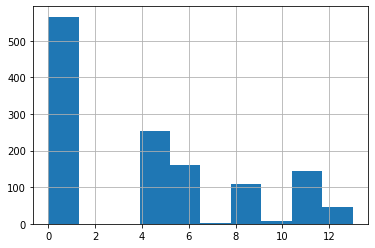

In [36]:
df[df['Fraud'] == True].channels.hist();

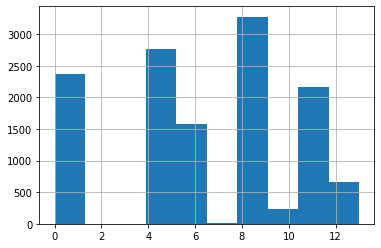

In [37]:
df[df['Fraud'] == False].channels.hist();

In [39]:
df['delivery_method'].value_counts()

0.0    8520
1.0    5554
3.0     247
Name: delivery_method, dtype: int64